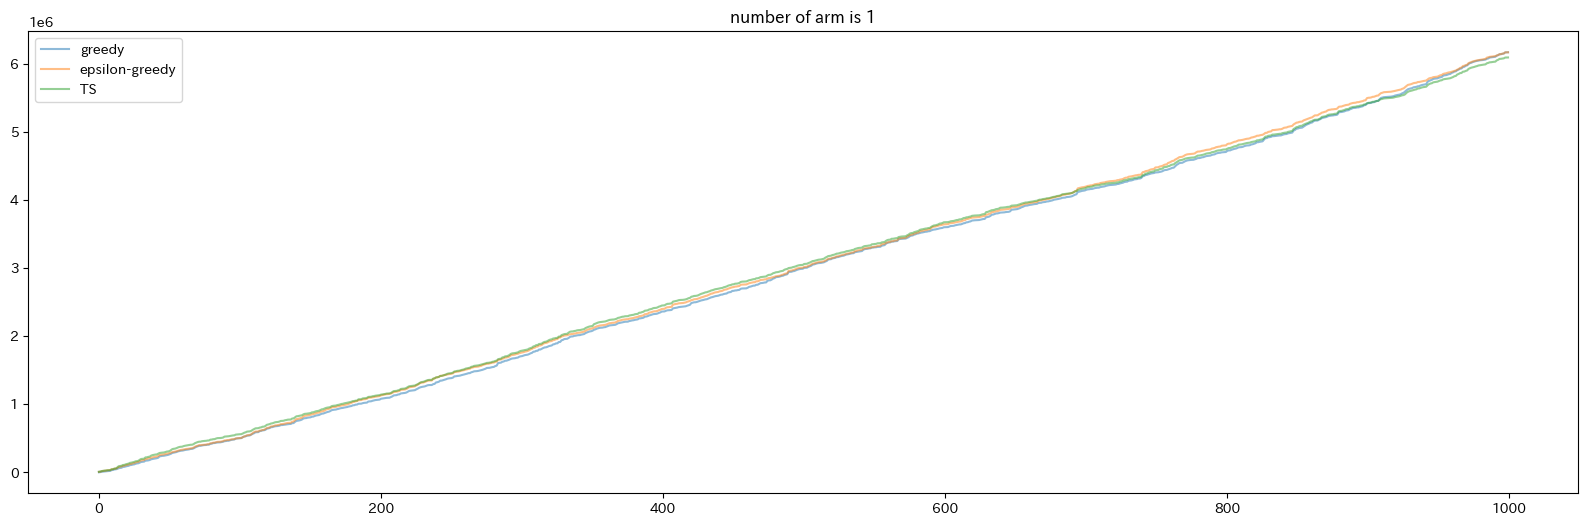

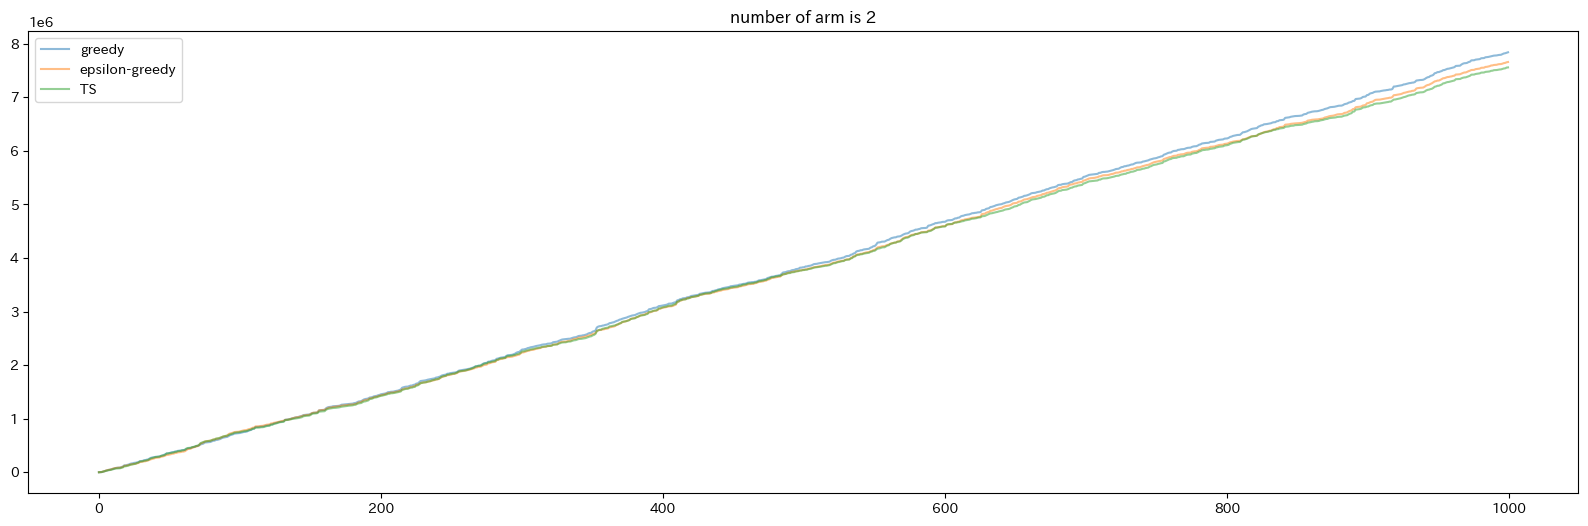

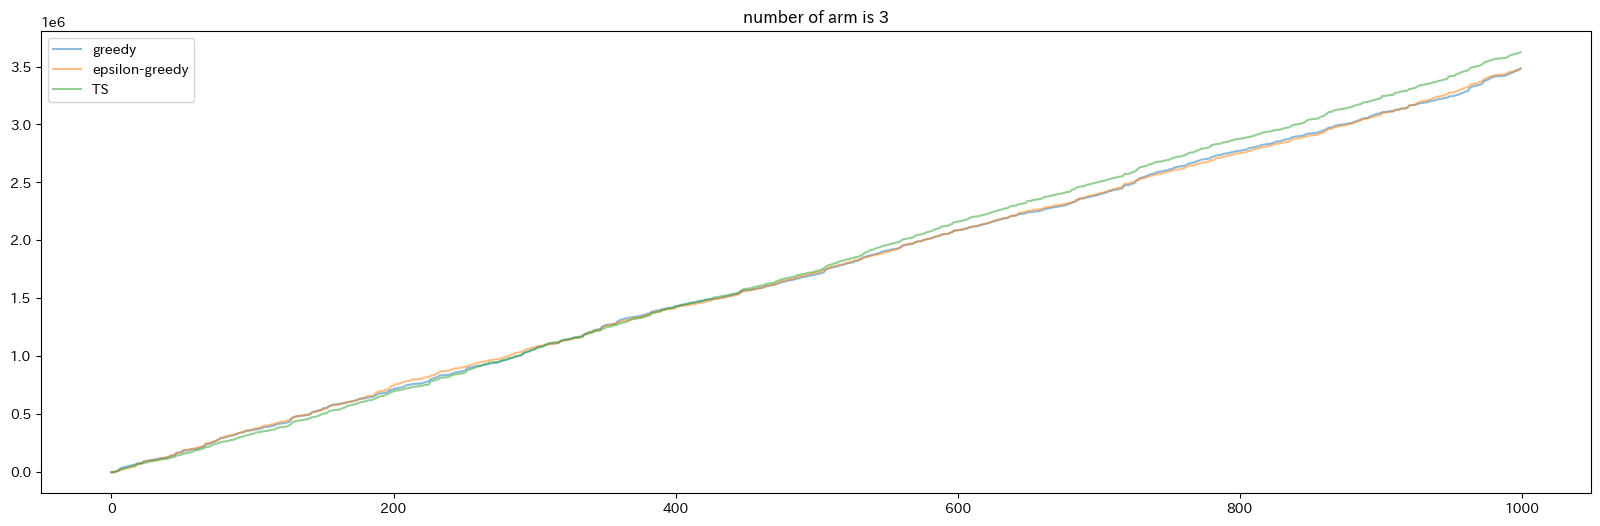

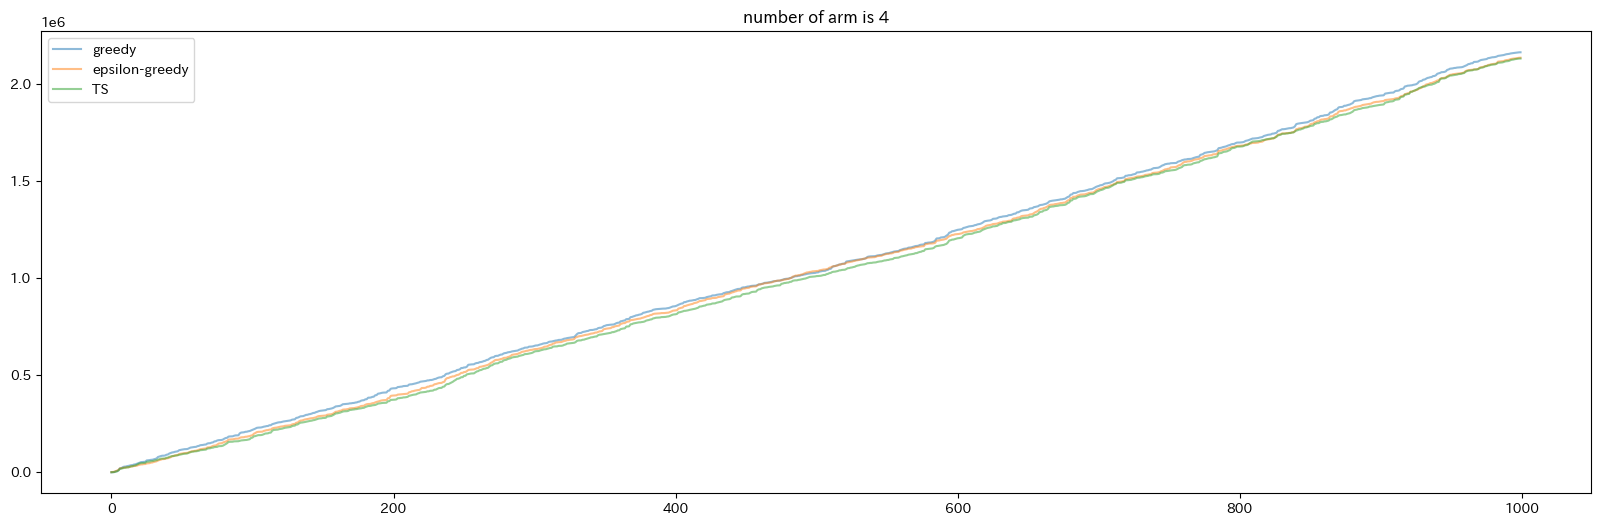

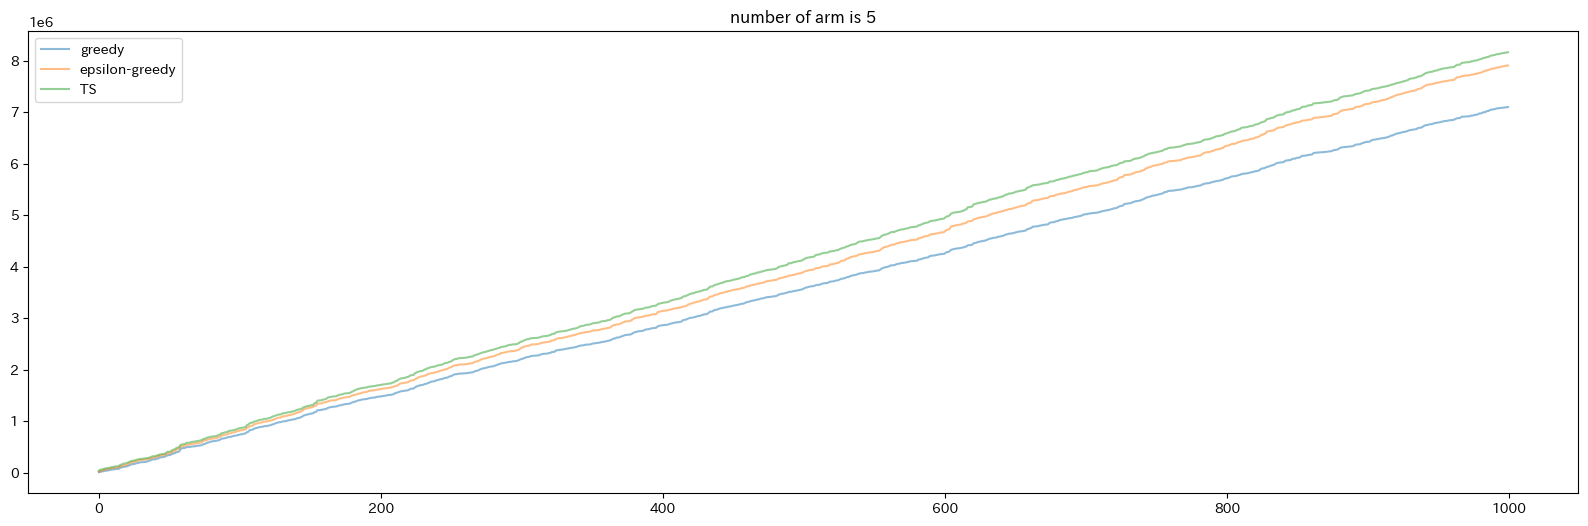

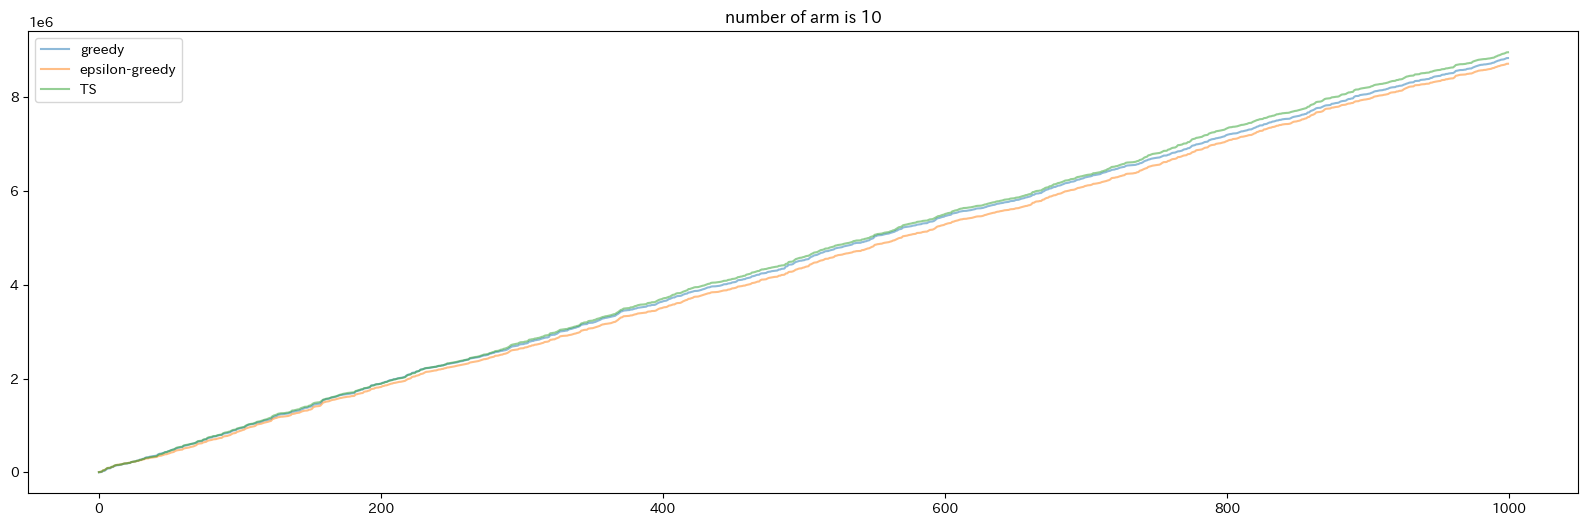

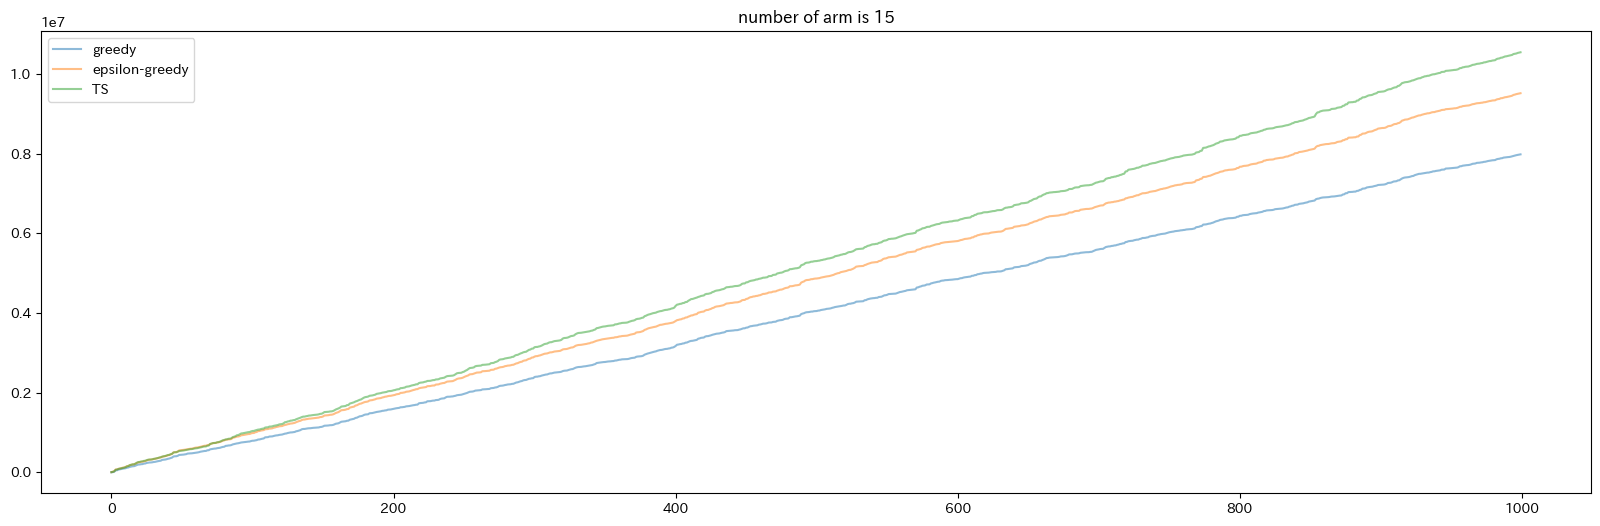

1,greedy : 6,172,467.624383411
1,epsilon-greedy : 6,172,216.766795063
1,TS : 6,096,232.9279498495
2,greedy : 7,840,871.102380834
2,epsilon-greedy : 7,659,197.906510241
2,TS : 7,558,398.831517752
3,greedy : 3,483,944.2312122243
3,epsilon-greedy : 3,479,422.4557060897
3,TS : 3,622,688.7703757836
4,greedy : 2,161,216.5080417134
4,epsilon-greedy : 2,133,181.156133211
4,TS : 2,128,930.71131315
5,greedy : 7,097,539.09888382
5,epsilon-greedy : 7,904,465.642619677
5,TS : 8,160,404.016249937
10,greedy : 8,839,431.666385429
10,epsilon-greedy : 8,718,107.28920791
10,TS : 8,962,792.747153461
15,greedy : 7,985,434.362467005
15,epsilon-greedy : 9,520,806.356581673
15,TS : 10,548,768.085352402


In [ ]:
class MAB:
    def __init__(self,n_arms,**kwargs):
      #self.n_arms = n_arms
      self.kwargs = kwargs
      self.arms = [ {'rate':np.random.beta(0.94, 18.192), 'res':[1,0], 'fee_rate': 0.1 + 0.1 * np.random.random()} for _ in range(n_arms)]
      #self.arms = [ {'rate':0.3 ,'res':[1,0],'fee_rate':0.3} ,{'rate':0.2, 'res':[1,0],'fee_rate':0.4},{'rate':0.25, 'res':[1,0],'fee_rate':0.20}]
    def choose(self,policy,i,price):
      ''''
        arms : list[dict( 'res' : tuple[ number_of_ref, number_of_contract]], 'fee_rate' : int,'true_rate':int)

        return : index of chosen bandit.
      '''
          
      if policy == "greedy":
          if i < 5:
            return np.random.randint(len(self.arms))
          chosen_ind = np.argmax([ (arm['res'][1] / arm['res'][0])*arm['fee_rate']  for arm in self.arms])
      elif policy == "epsilon-greedy":
          if np.random.rand() < self.kwargs['epsilon']:
            chosen_ind =  np.random.randint(len(self.arms))
          else:
            chosen_ind= np.argmax([ (arm['res'][1] / arm['res'][0])*arm['fee_rate']  for arm in self.arms])
      elif policy == "TS":
          chosen_ind= np.argmax([ np.random.beta( arm['res'][1]+1, arm['res'][0] - arm['res'][1]+1) * arm['fee_rate'] for arm in self.arms])
      elif policy == 'now':
          if i < 2:
              return np.random.randint(len(self.arms))
          chosen_ind = np.argmax([ (arm['res'][1] / arm['res'][0])* np.abs(np.atan)]  for arm in self.arms])
      else:
        raise ValueError("")
      return chosen_ind

    def run(self,p,**kwargs):
        
        reward = []
        #price =np.clip(price,1e5,1e8)
        for i in range(1000):
            #price=6
            
            chosen_ind = self.choose(p,i,price)
            self.arms[chosen_ind]['res'][0]+=1
            
            if np.random.random() < self.arms[chosen_ind]['rate']:
                r = price[i] * self.arms[chosen_ind]['fee_rate']
                self.arms[chosen_ind]['res'][1]+=1
            else:
                r = 0
            reward.append(r)
        reward = np.cumsum(reward)
        return reward

all_res = {}

for n_arms in [1,2,3,4,5,10,15]:

    plt.figure(figsize=(20,6))
    all_res[n_arms] = {}
    
    mab=  MAB(n_arms,epsilon=0.05)
    price = np.random.gamma(1.8, 3e5,size=1000)
    for p in ['greedy','epsilon-greedy','TS']:
        res = []
        for _ in range(200):
            

            res.append(mab.run(p))

        all_res[n_arms][p]= np.mean(res,axis=0)
        #plt.errorbar(x=range(len(res[0])),y=np.mean(res,axis=0),yerr=(1.96 * np.std(res,axis=0) / np.sqrt(100)),label=p,alpha=0.5)
        plt.plot(range(len(res[0])),np.mean(res,axis=0),label=p,alpha=0.5)
    plt.legend()
    plt.title(f'number of arm is {n_arms}')
    plt.show()
for n,d in all_res.items():
  for p,r in d.items():
    print(f"{n},{p} : {r[-1]:,}")
#print(all_res['TS'][-1] - all_res['greedy'][-1] )